In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import statsmodels.api as sm

from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pandas.plotting import lag_plot


In [2]:
data_1 = pd.read_excel("masterfile 2cols sorted.xlsx", index_col="datetime", parse_dates=True)
data_1.index.asfreq = 'H' # monhly start data non stationary
data_1.index

Index(['2022.10.31 01:00', '2022.10.31 02:00', '2022.10.31 03:00',
       '2022.10.31 04:00', '2022.10.31 05:00', '2022.10.31 06:00',
       '2022.10.31 07:00', '2022.10.31 08:00', '2022.10.31 09:00',
       '2022.10.31 10:00',
       ...
       '2019.07.01 15:00', '2019.07.01 16:00', '2019.07.01 17:00',
       '2019.07.01 18:00', '2019.07.01 19:00', '2019.07.01 20:00',
       '2019.07.01 21:00', '2019.07.01 22:00', '2019.07.01 23:00',
       '2019.07.01 24:00'],
      dtype='object', name='datetime', length=29233)

In [2]:
data_1 = pd.read_excel("7th month.xlsx", index_col="datetime", parse_dates=True)
data_1.index.asfreq = 'D' # monhly start data non stationary
data_1.index

Index(['2022.10.01 01:00:00', '2022.10.01 02:00:00', '2022.10.01 03:00:00',
       '2022.10.01 04:00:00', '2022.10.01 05:00:00', '2022.10.01 06:00:00',
       '2022.10.01 07:00:00', '2022.10.01 08:00:00', '2022.10.01 09:00:00',
       '2022.10.01 10:00:00',
       ...
       '2022.10.31 15:00:00', '2022.10.31 16:00:00', '2022.10.31 17:00:00',
       '2022.10.31 18:00:00', '2022.10.31 19:00:00', '2022.10.31 20:00:00',
       '2022.10.31 21:00:00', '2022.10.31 22:00:00', '2022.10.31 23:00:00',
       '2022.10.31 24:00:00'],
      dtype='object', name='datetime', length=744)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

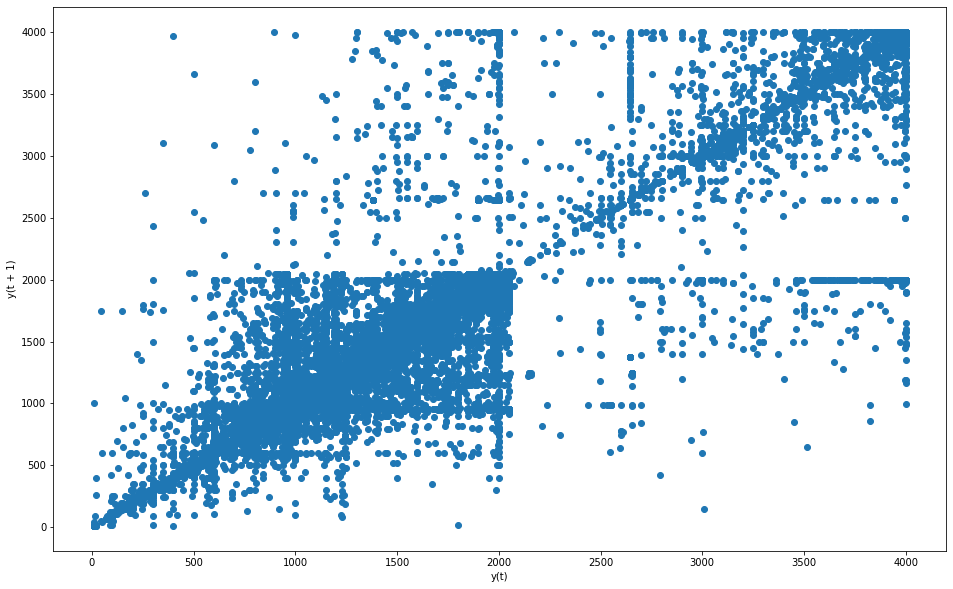

In [3]:
plt.figure(figsize=(16,10))
lag_plot(data_1)

In [ ]:
data_1.head()

<AxesSubplot: xlabel='datetime'>

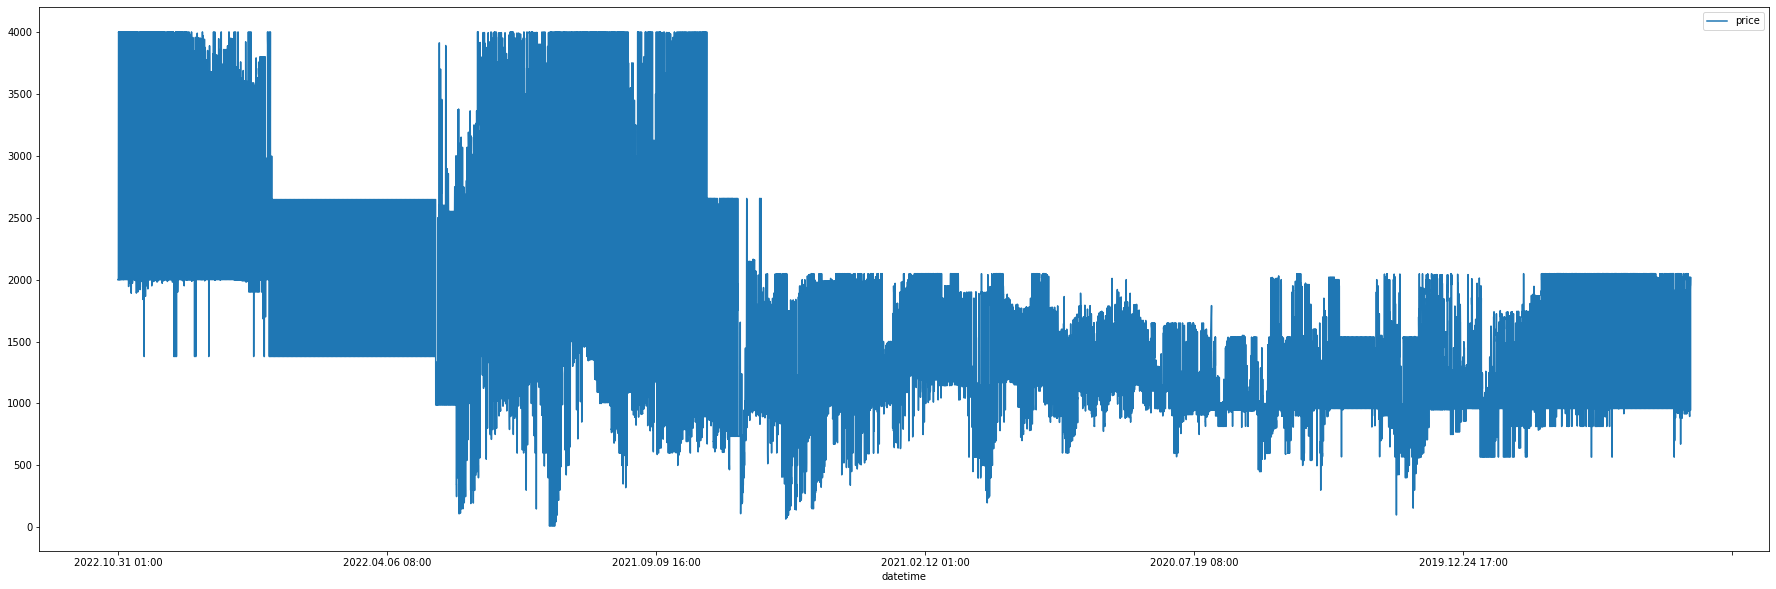

In [3]:
data_1.plot(figsize=(31,10))

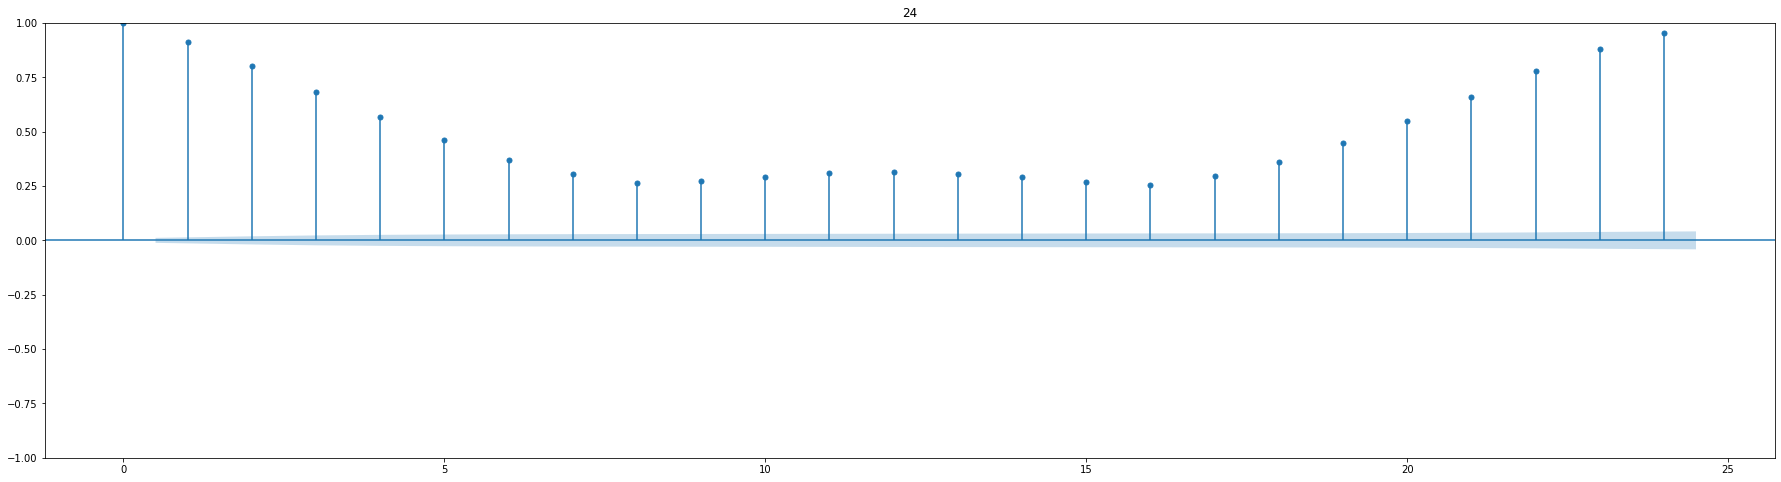

In [5]:
fig,ax = plt.subplots(figsize=(31,8))

d1 = plot_acf(data_1.price, lags=24,ax=ax, title='24')

KeyboardInterrupt: 

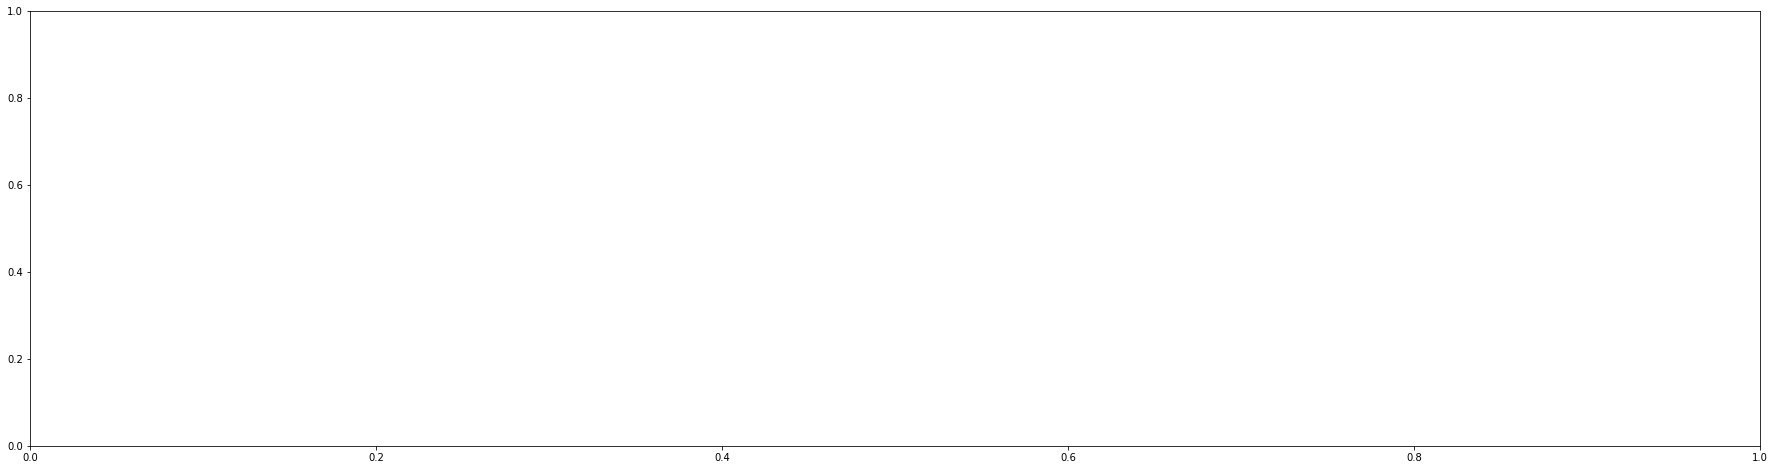

In [21]:
fig,ax = plt.subplots(figsize=(31,8))
#print(ax)
plot_pacf(data_1, lags=744,ax=ax, title='2021.07')

In [15]:
def df_autocorr(df, lag=168, axis=0):
    """Compute full-sample column-wise autocorrelation for a DataFrame."""
    return df.apply(lambda col: col.autocorr(lag), axis=axis)

df_autocorr(data_1)

price    0.913022
dtype: float64

In [16]:
def df_autocorr(df, lag, axis=0):
    """Compute full-sample column-wise autocorrelation for a DataFrame."""
    return df.apply(lambda col: col.autocorr(lag), axis=axis)

df_autocorr(data_1, 24)

price    0.955022
dtype: float64

In [18]:
#find autocoee coefs ==> find best autocorr 'lags'
a = []
for i in range(8760):   # 365 * 24
    coef = df_autocorr(data_1, i)
    a.append([i, coef])

#print(a)  
max_v, max_j = 0,0

for j in range(1,len(a)-1):
    if a[j][1].item() > max_v:
        max_v = a[j][1].item()
        max_j = a[j][0]
print("\nMAX AUTOCORR COEF =>",max_v)
print("BEST AUTOCORR INDEX =>",max_j)




MAX AUTOCORR COEF => 0.9550222670164796
BEST AUTOCORR INDEX => 24
